In [1]:
import pandas as pd
import pylab as plt
import numpy as np
%matplotlib inline

In [2]:
slots = pd.read_json('condor_slots.DESY.2020-03-14.2020-03-24.json.gz',
             compression='gzip',
             lines=True,
            
            )
slots = slots.set_index(['glidein_id', 'host', pd.IntervalIndex.from_arrays(slots['start_time'], slots['end_time'], name='timespan')])
slots['wallclock_seconds'] = (slots['end_time']-slots['start_time'])/np.timedelta64(1, 's')
slots = slots.rename(columns={'TotalCpus': 'TotalCPUs'})
slots.head()

,,,TotalCPUs,TotalDisk,TotalGPUs,TotalGPUs_normalized,TotalMemory,end_time,site,slot,start_time,wallclock_seconds
glidein_id,host,timespan,,,,,,,,,,
15986,kepler14.zeuthen.desy.de,"(2020-03-14 19:38:21, 2020-03-14 19:53:31]",4,65536000,2,0.746440,15600,2020-03-14 19:53:31,DE-DESY,slot1,2020-03-14 19:38:21,910.0
203084,pascal01.zeuthen.desy.de,"(2020-03-14 19:27:35, 2020-03-14 19:42:46]",12,196608000,6,4.407871,140400,2020-03-14 19:42:46,DE-DESY,slot1,2020-03-14 19:27:35,911.0
143042,pascal05.zeuthen.desy.de,"(2020-03-14 19:27:33, 2020-03-14 19:42:44]",12,196608000,6,4.407871,140400,2020-03-14 19:42:44,DE-DESY,slot1,2020-03-14 19:27:33,911.0
67622,pascal06.zeuthen.desy.de,"(2020-03-14 19:58:31, 2020-03-14 20:13:41]",12,196608000,6,4.407871,140400,2020-03-14 20:13:41,DE-DESY,slot1,2020-03-14 19:58:31,910.0
146429,pascal05.zeuthen.desy.de,"(2020-03-14 19:58:29, 2020-03-14 20:13:41]",12,196608000,6,4.407871,140400,2020-03-14 20:13:41,DE-DESY,slot1,2020-03-14 19:58:29,912.0


In [3]:
jobs = pd.read_json('condor_jobs.DESY.2020-03-14.2020-03-24.json.gz',
             compression='gzip',
             lines=True,
            
            )
jobs = jobs.set_index(['glidein_id', 'host', pd.IntervalIndex.from_arrays(jobs['start_time'], jobs['end_time'], name='timespan')])
jobs['wallclock_seconds'] = (jobs['end_time']-jobs['start_time'])/np.timedelta64(1, 's')
jobs = jobs.rename(columns={'Requestgpus': 'RequestGPUs', 'RequestCpus': 'RequestCPUs'})
jobs.head()

,,,CommittedTime,GlobalJobId,JobStatus,LastHoldReason,RemoteWallClockTime,RequestCPUs,RequestDisk,RequestMemory,RequestGPUs,end_time,site,slot,start_time,wallclock_seconds
glidein_id,host,timespan,,,,,,,,,,,,,,
799,kepler10.zeuthen.desy.de,"(2020-03-15 05:53:57, 2020-03-15 05:54:21]",0,sub-simprod-2.icecube.wisc.edu#8415957.0#15840...,3,,172137,2,5500000,3300,1,2020-03-15 05:54:21,DE-DESY,slot1_2,2020-03-15 05:53:57,24.0
16715,kepler05.zeuthen.desy.de,"(2020-03-14 23:26:51, 2020-03-15 06:20:39]",0,sub-simprod-2.icecube.wisc.edu#8426753.0#15841...,3,,138478,2,1100000,1980,1,2020-03-15 06:20:39,DE-DESY,slot1_2,2020-03-14 23:26:51,24828.0
3067,kepler22.zeuthen.desy.de,"(2020-03-16 14:29:00, 2020-03-16 19:25:55]",17815,sub-simprod-2.icecube.wisc.edu#8461362.0#15843...,4,,46284,2,5500000,3300,1,2020-03-16 19:25:55,DE-DESY,slot1_2,2020-03-16 14:29:00,17815.0
25866,kepler13.zeuthen.desy.de,"(2020-03-16 07:22:58, 2020-03-16 15:01:30]",27512,sub-simprod-2.icecube.wisc.edu#8461121.0#15843...,4,,69680,2,5500000,3300,1,2020-03-16 15:01:30,DE-DESY,slot1_2,2020-03-16 07:22:58,27512.0
215682,trex01.zeuthen.desy.de,"(2020-03-16 11:05:59, 2020-03-16 13:57:46]",10307,sub-simprod-2.icecube.wisc.edu#8461096.0#15843...,4,,65933,2,5500000,3300,1,2020-03-16 13:57:46,DE-DESY,slot1_1,2020-03-16 11:05:59,10307.0


In [4]:
def get_claims(slot):
    """
    Sum the resource claims of jobs that were assigned to a slot
    """
    usage = {f'{category}{resource}': 0 for category in ('Claimed', 'Committed') for resource in ('GPUs', 'CPUs', 'Memory', 'Disk')}
    try:
        slot_jobs = jobs.loc[slot.name[:-1]].loc[slot.name[-1]]
    except KeyError:
        return usage
    for category in 'Claimed', 'Committed':
        if category == 'Committed':
            time_weight = slot_jobs['CommittedTime']
        else:
            time_weight = slot_jobs['wallclock_seconds']
        for resource in ('GPUs', 'CPUs', 'Memory', 'Disk'):
            usage[f'{category}{resource}'] = (slot_jobs[f'Request{resource}']*time_weight).sum()/(getattr(slot, f'Total{resource}')*slot.wallclock_seconds)

    return usage

In [5]:
slots = slots.join(slots.apply(get_claims, axis=1, result_type="expand"))

/afs/ifh.de/group/amanda/scratch/jvsanten/software/miniconda3/envs/pandas/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


In [6]:

def sum_slots(dataframe, key):
    """
    Sum the resource claims on a group of slots
    """
    try:
        group = dataframe.loc[key]
    except KeyError:
        return {}
    result = {'glideins': len(group)}
    for resource in ('GPUs', 'CPUs', 'Memory', 'Disk'):
        total = f'Total{resource}'
        result[total] = group[total].sum() 
        for category in 'Claimed', 'Committed':
            weight = f'{category}{resource}'
            result[weight] = (group[total]*group[weight]).sum()
    return result

def to_timeseries(slots):
    """
    Convert slots with overlapping timespans to a time series of total resource claims
    """
    by_time = slots.droplevel([0,1])
    # construct an IntervalIndex from all unique edges
    # this is used to ensure that 
    edges = np.unique(np.concatenate((by_time.index.left.values, by_time.index.right.values)))
    ii = pd.IntervalIndex.from_arrays(edges[:-1], edges[1:])
    return pd.DataFrame([sum_slots(by_time, t) for t in ii.values], index=ii.left)

total_claims = to_timeseries(slots).rolling('1h').mean()

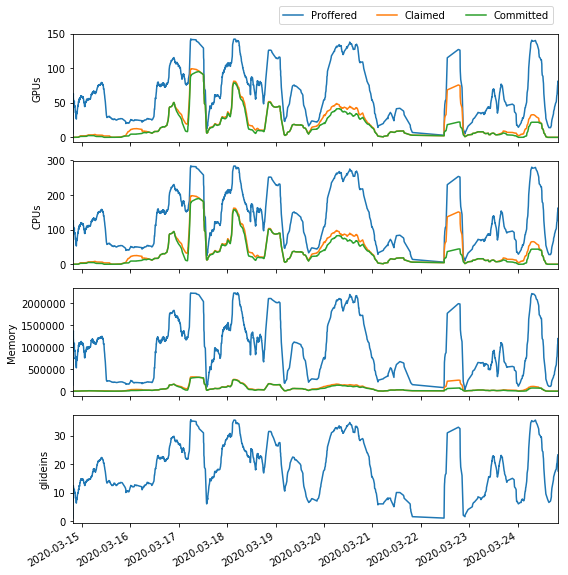

In [8]:
fig, axes = plt.subplots(4,1, sharex=True, figsize=(8,8))
for i, resource in enumerate(('GPUs', 'CPUs', 'Memory')):
    ax = axes.flat[i]
    columns = {
        f'Total{resource}': 'Proffered',
        f'Claimed{resource}': 'Claimed',
        f'Committed{resource}': 'Committed',
    }
    sub = total_claims[columns.keys()].rename(columns=columns)
    sub.plot(ax=ax, legend=False)
    ax.set_ylabel(resource)
ax=axes.flat[3]
total_claims['glideins'].plot(ax=axes.flat[3])
ax.set_ylabel('glideins')
axes.flat[0].legend(ncol=3, bbox_to_anchor=(0,0,1,1.3))
plt.tight_layout()